<a href="https://colab.research.google.com/github/jpbezerra/tiktok-analysis/blob/main/tiktok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETTINGS

In [193]:
# imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as st
import seaborn as sns

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [194]:
# configurations

data_path = "./user_data_tiktok.json"

my_colors = [
    "#E83E3E", "#E88929", "#ECDF2F", "#7BEC2F",
    "#30C986", "#1FC1B7", "#1CDDFA", "#298CBD",
    "#1382F2", "#1347F2", "#936DD4", "#DF37F2"
]

months_name = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]

hours_name = [f"{x}h" for x in range(24)]

days_name = [f"{day}" for day in range(1, 32)]

significance = 0.05

font_size = 7

In [195]:
# creating Data class

class Data:
    data_json_path = data_path

    def __init__(self) -> None:
        self.data = pd.read_json(data_path)

        self.activity = self.data["Activity"]
        self.ads = self.data['Ads and data']
        self.comments = self.data['Comment']
        self.messages = self.data['Direct Messages']

        self.guard = {}

In [196]:
# defining auxiliary functions

def months_and_hours_review(data: np.ndarray, y: str, title: str, target_label='Date', return_data=True) -> list[np.ndarray] | None:
    months = np.zeros(12, dtype=int)
    hours = np.zeros(24, dtype=int)

    for label in data:
        date, time = label[target_label].split(' ')

        months[int(date.split('-')[1]) - 1] += 1
        hours[int(time.split(':')[0])] += 1

    # barplot of date
    plt.bar(
        x=months_name,
        height=months,
        color=my_colors
    )

    plt.xlabel("Months")
    plt.ylabel(f"Amount of {y}")
    plt.title(f"Relation between months and {title}")
    plt.xticks(fontsize=font_size)
    plt.grid()
    plt.show()

    # barplot of time
    plt.bar(
        x=hours_name,
        height=hours,
        color=my_colors
    )

    plt.xlabel("Hours")
    plt.ylabel(f"Amount of {y}")
    plt.title(f"Relation between hours and {title}")
    plt.xticks(fontsize=font_size)
    plt.grid()
    plt.show()

    if return_data:
        return [months, hours]


def pie_review(data : np.ndarray, target_label : str, title : str) -> None:
    information : dict[str, int] = {}

    for info in data:
        target = info[target_label]

        try:
            information[target] += 1

        except KeyError:
            information[target] = 1

    temp : dict[str, int] = information.copy()

    for key, value in temp.items():
        if 15 > value:
            try:
                information['Others'] += value

            except KeyError:
                information['Others'] = value

            finally:
                information.pop(key)

    plt.pie(
        x=information.values(), labels=information.keys(), autopct='%1.1f%%', colors=my_colors,
        pctdistance=0.80
    )

    plt.title(f"Percentage of {title}")
    plt.show()


def unique(data : np.ndarray, target_label : str) -> np.ndarray:
    result : np.ndarray = np.array([])

    for info in data:
        result = np.append(result, info[target_label])

    return np.unique(result)


def line_review(data : np.ndarray, target_label : str, title : str) -> None:
    days : np.ndarray = np.zeros(31, dtype=int)

    for info in data:
        days[int(info[target_label].split(' ')[0].split('-')[2]) - 1] += 1

    plt.plot(days_name, days, marker='o')
    plt.title(f"Relation between days and {title}")
    plt.xticks(fontsize=font_size)
    plt.grid()
    plt.xlabel("Days")


def get_measures(data : np.ndarray) -> dict:
    return {'Mean' : st.mean(data), 'Median' : st.median(data), 'SD' : st.stdev(data)}


def check_relation(first_data : np.ndarray, second_data : np.ndarray, first_label : str, second_label : str) -> None:
    plt.scatter(x=first_data, y=second_data)
    plt.xlabel(first_label)
    plt.ylabel(second_label)
    plt.grid()
    plt.show()


def hypotesis_analysis(statistics : float, p_value : float, coefficient : str) -> None:
    print(f"{coefficient} : {statistics:.4f}\nP-value : {p_value:.4f}")

    if p_value < significance:
        print("The null hypotesis is rejected\n")

    else:
        print("The null hypotesis is not rejected\n")


def hypotesis_graphic(data : pd.DataFrame, first_label : str, second_label : str) -> None:
    sns.jointplot(
        data=data,
        x=first_label,
        y=second_label,
        kind="kde",
        xlim=(data[first_label].min(), data[first_label].max()),
        ylim=(data[second_label].min(), data[second_label].max())
    )

    plt.show()

In [197]:
# creating the dataset

if __name__ == "__main__":
    data = Data()

# MESSAGES

## Setting data

In [198]:
# declaring variables

chat_history : dict[str, list] = data.messages['Chat History']['ChatHistory']

info : dict[str, int] = {}
measures_each_account : np.ndarray = np.array([])
account_names : np.ndarray = np.array([])

my_messages = np.array([])
other_messages = np.array([])

In [199]:
# getting data

for key, value in chat_history.items():
    if 10 > len(value):
        try:
            info['Others'] += len(value)

        except KeyError:
            info['Others'] = len(value)

    else:
        info[key.split(' ')[-1].split(':')[0]] = len(value)

    account_names = np.append(account_names, key)
    measures_each_account = np.append(measures_each_account, len(value))

    for subdata in value:
        if subdata['From'] == "jp__bezerra":
            my_messages = np.append(my_messages, subdata)

        else:
            other_messages = np.append(other_messages, subdata)

## Graphics

### Messages by acount

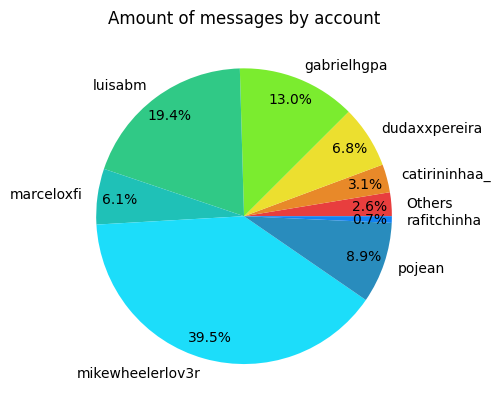

In [200]:
plt.pie(
    x=info.values(), labels=info.keys(), autopct='%1.1f%%', colors=my_colors,
    pctdistance=0.85
)

plt.title("Amount of messages by account")
plt.show()

### Messages sent by me

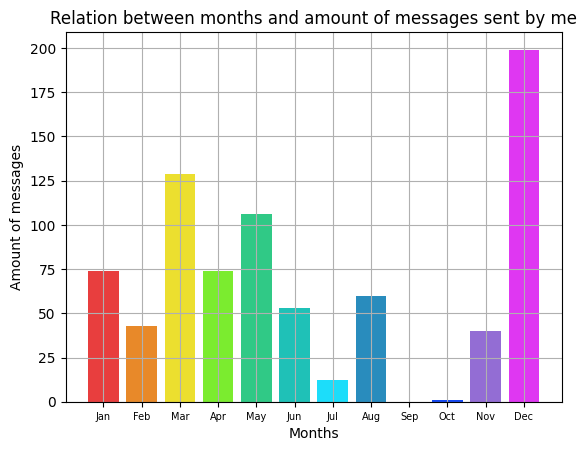

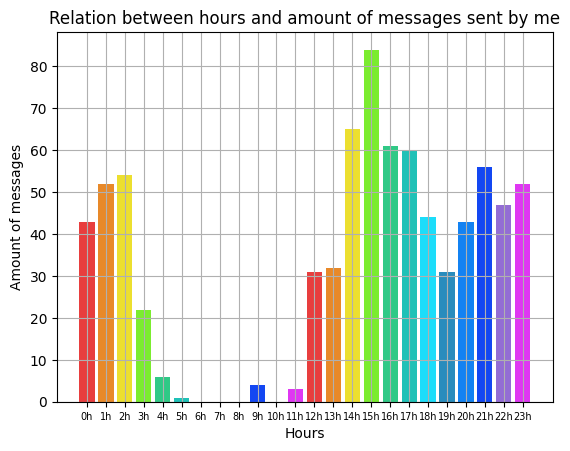

In [201]:
m_sent, h_sent = months_and_hours_review(my_messages, "messages", "amount of messages sent by me")

### Messages sent by other users

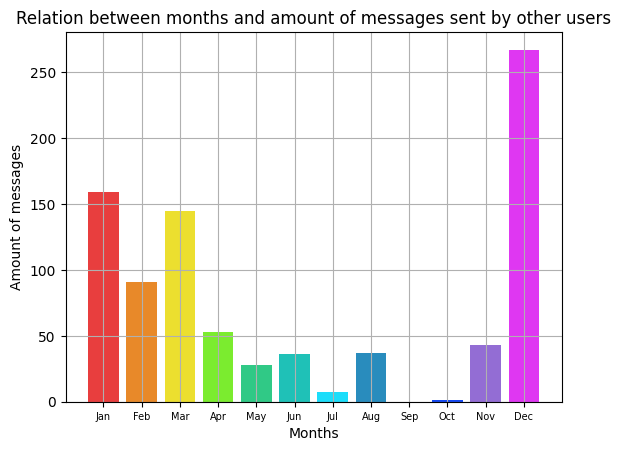

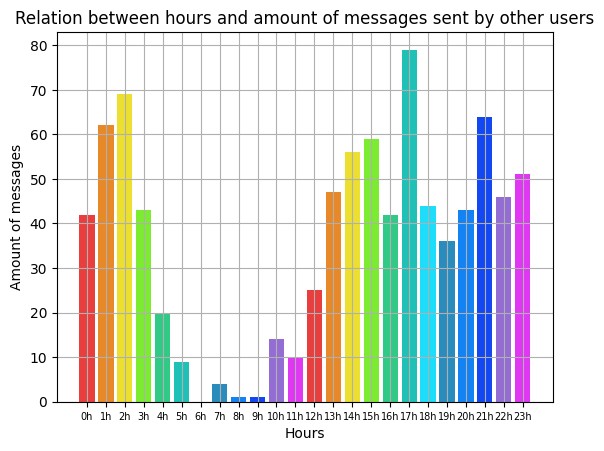

In [202]:
m_receive, h_receive = months_and_hours_review(other_messages, "messages", "amount of messages sent by other users")

### Chat with most messages

In [203]:
list_messages = list(info.values())
max_value = np.max(list_messages)
label_max = list(info.keys())[list_messages.index(max_value)]

print(f"With {max_value} messages, the person who I have most messages with is {label_max}")

With 655 messages, the person who I have most messages with is mikewheelerlov3r


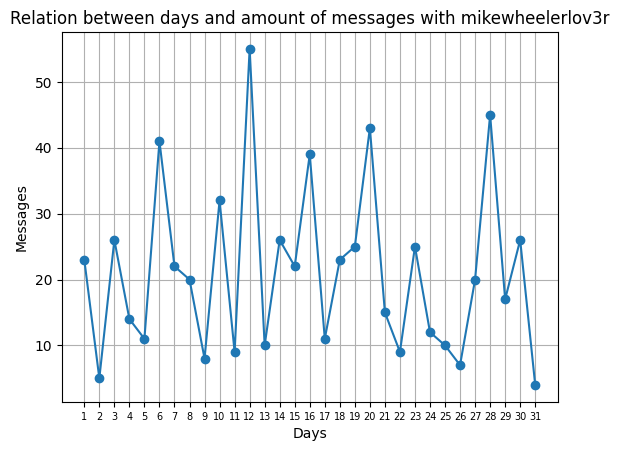

In [204]:
line_review(chat_history[f"Chat History with {label_max}:"], 'Date', f"amount of messages with {label_max}")
plt.ylabel("Messages")
plt.show()

## Measures

In [205]:
measures = get_measures(measures_each_account)
print(f"Mean : {measures['Mean']}\nMedian : {measures['Median']}\nStandard Deviation : {measures['SD']}")

Mean : 87.26315789473684
Median : 8.0
Standard Deviation : 163.49816244474133


## Storing data

In [206]:
# storing variables for later

data.guard['Messages'] = {'M' : [m_sent, m_receive], 'H' : [h_sent, h_receive]}

# COMMENTS

## Setting data

In [207]:
# declaring variables

comments = np.array(data.comments['Comments']['CommentsList'])

## Graphics

### Amount of comments

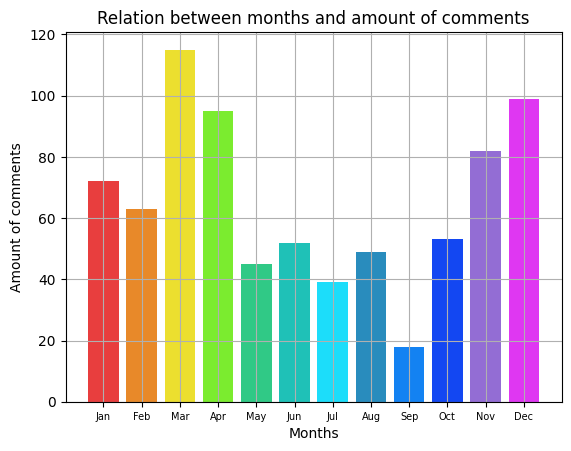

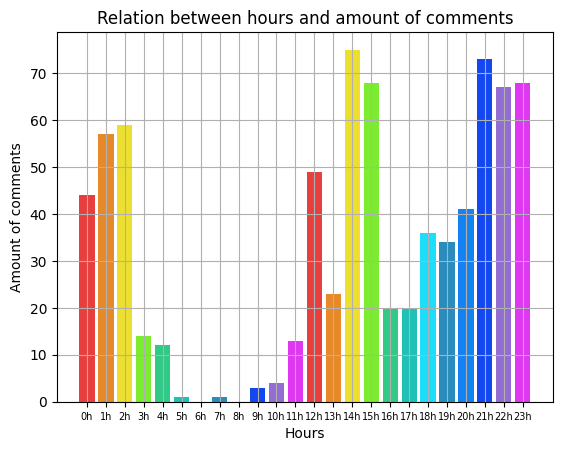

In [208]:
m_comments, h_comments = months_and_hours_review(comments, "comments", "amount of comments")

## Measures

In [209]:
sizes = np.array([])
for comment in comments:
    sizes = np.append(sizes, len(comment['Comment']))

print(f"I have an average of typing {np.mean(sizes):.2f} characters per comment")

I have an average of typing 12.63 characters per comment


## Storing data

In [210]:
# storing variables for later

data.guard['Comments'] = {'M' : m_comments, 'H' : h_comments}

# ACTIVITY

## Setting data

In [211]:
# declaring variables

fav_video_list = np.array(data.activity['Favorite Videos']['FavoriteVideoList'])
like_list = np.array(data.activity['Like List']['ItemFavoriteList'])
search_history = np.array(data.activity['Search History']['SearchList'])
share_history = np.array(data.activity['Share History']['ShareHistoryList'])
video_browsing_history = np.array(data.activity['Video Browsing History']['VideoList'])
login_history = np.array(data.activity['Login History']['LoginHistoryList'])

## Graphs

### Amount of favorites

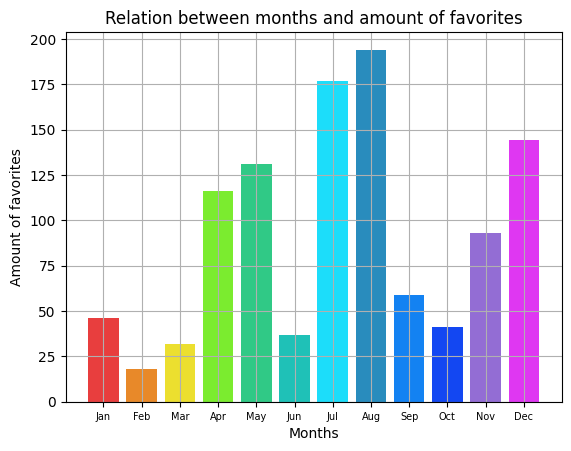

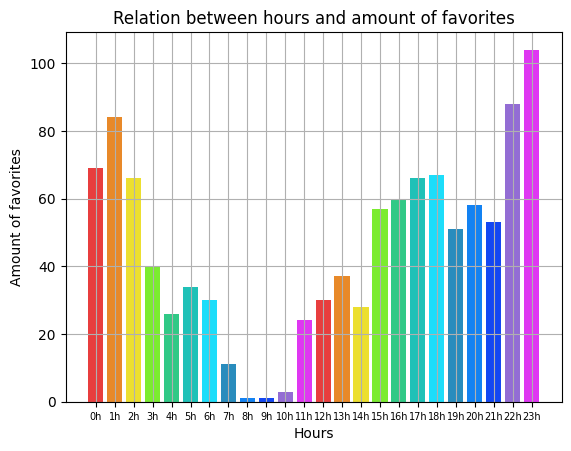

In [212]:
m_fav, h_fav = months_and_hours_review(fav_video_list, "favorites", "amount of favorites")

### Amount of likes

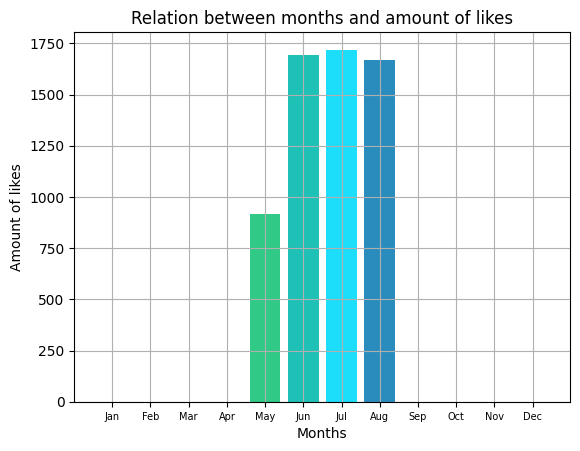

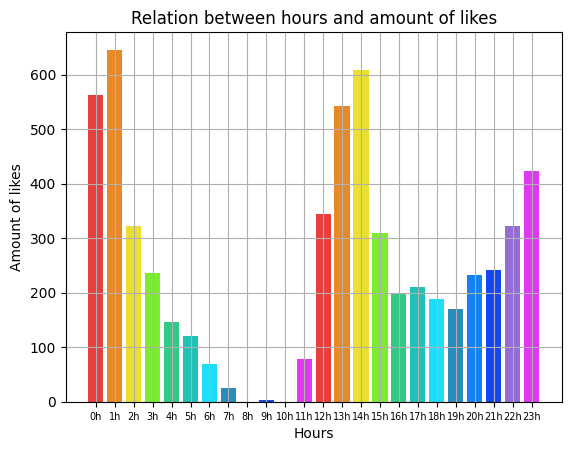

In [213]:
m_likes, h_likes = months_and_hours_review(like_list, "likes", "amount of likes")

### Amount of searchs

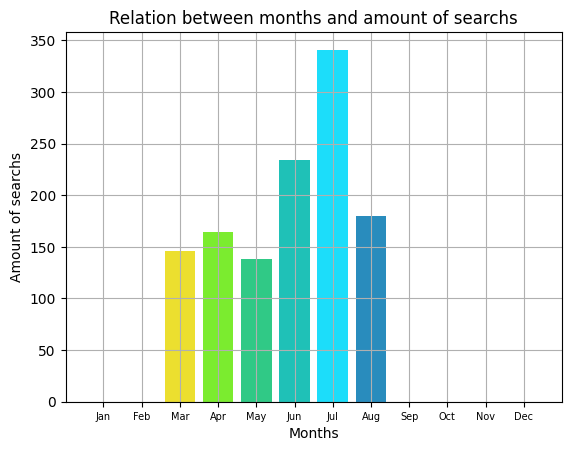

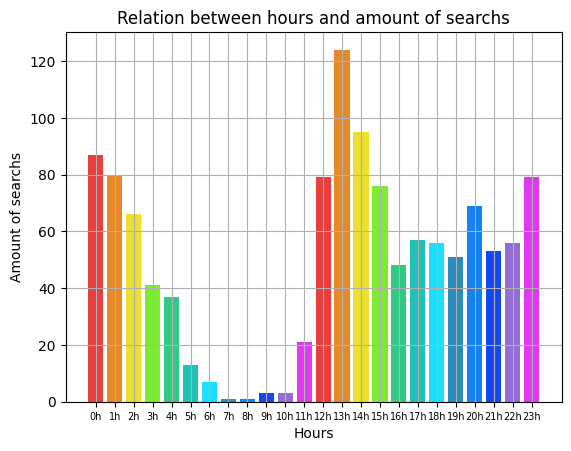

In [214]:
m_search, h_search = months_and_hours_review(search_history, "searchs", "amount of searchs")

### Amount of shares

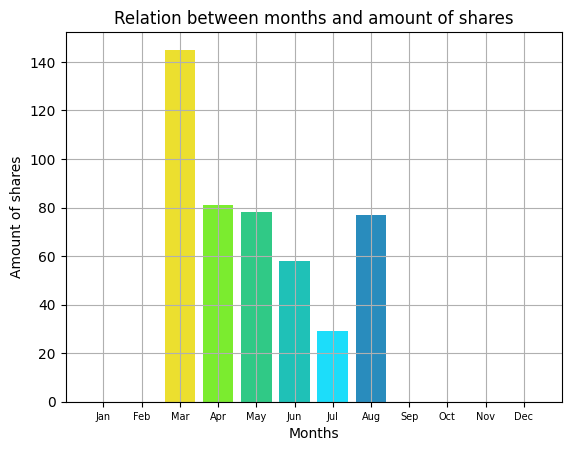

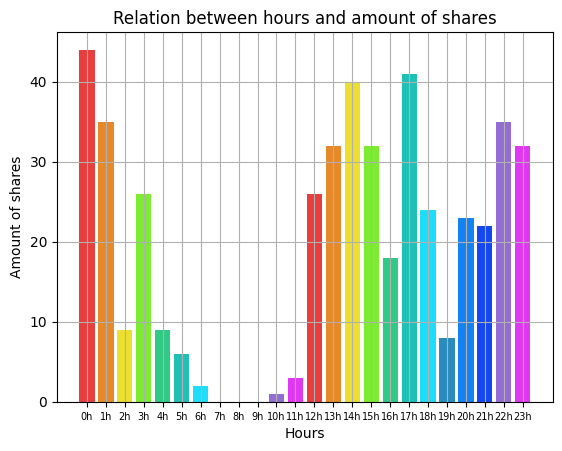

In [215]:
m_share, h_share = months_and_hours_review(share_history, "shares", "amount of shares")

### Amount of watched videos

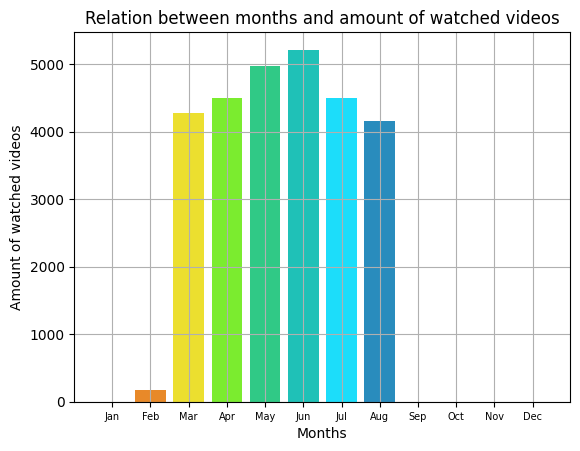

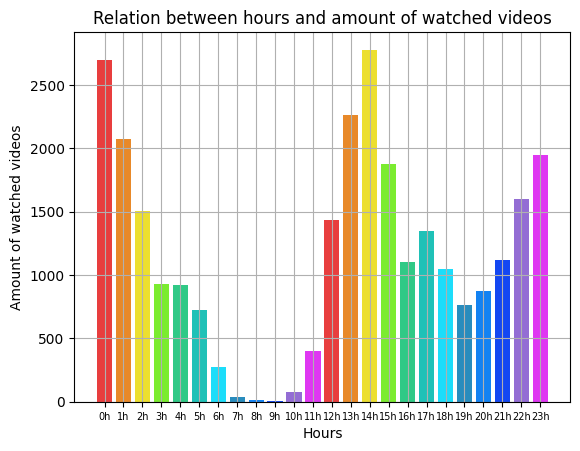

In [216]:
m_video, h_video = months_and_hours_review(video_browsing_history, "watched videos", "amount of watched videos")

### Amount of logins

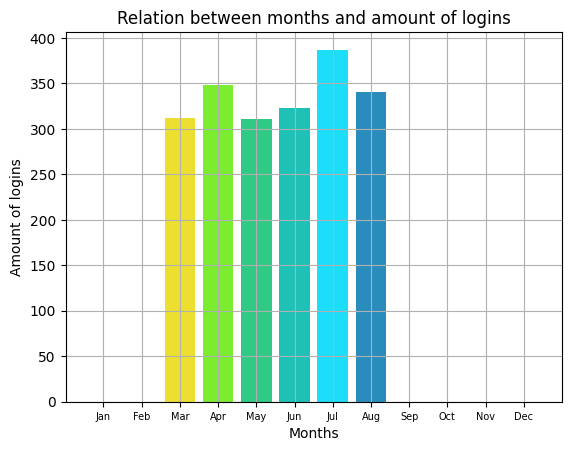

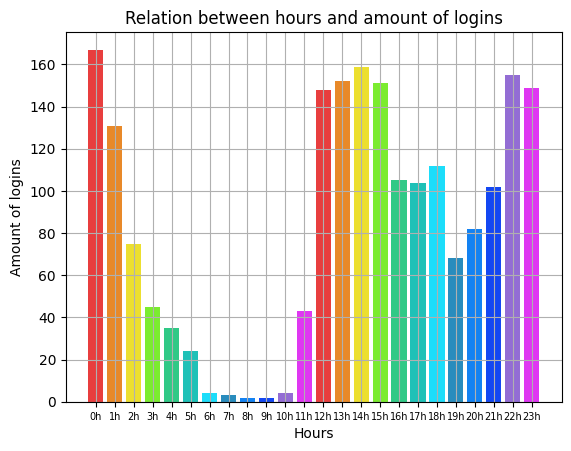

In [217]:
months_and_hours_review(login_history, "logins", "amount of logins", return_data=False)

### Logins x Network type

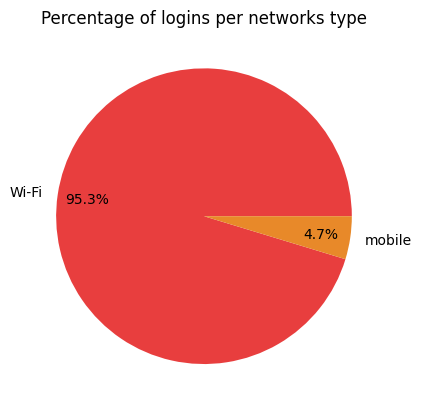

In [218]:
pie_review(login_history, 'NetworkType', "logins per networks type")

### Relation [Videos per hour x Likes per hour]

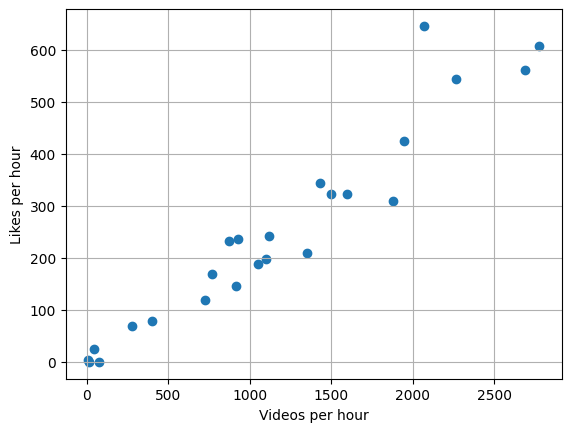

In [219]:
check_relation(h_video, h_likes, "Videos per hour", "Likes per hour")

- Based on the graph, it is noticeable that Likes per hour and Videos per hour have a strong and positive correlation; so it is a linear correlation.

### Relation [Likes per hour x Shares per hour]

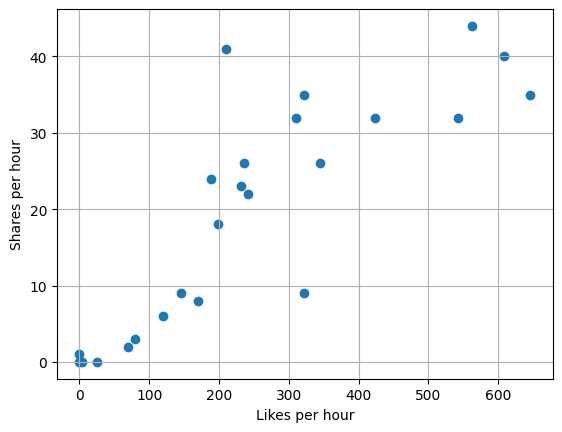

In [220]:
check_relation(h_likes, h_share, "Likes per hour", "Shares per hour")

- Based on the graph, it is noticeable that likes per hour and videos per hour have a waek and positive correlation; so it is not a linear correlation.

### Relation [Searchs per hour x Videos per hour]

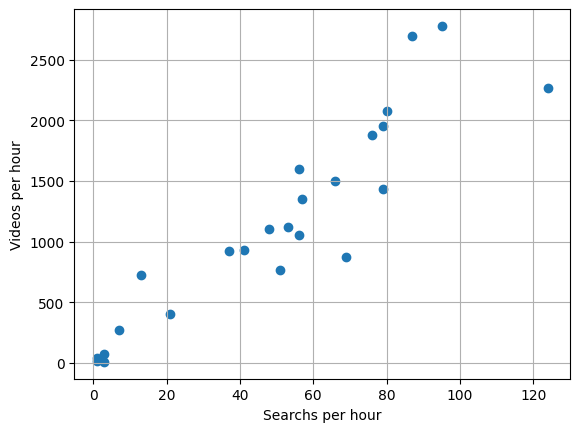

In [221]:
check_relation(h_search, h_video, "Searchs per hour", "Videos per hour")

- Based on the graph, it is noticeable that Videos per hour and Searchs per hour have a strong and positive correlation; so it is a linear correlation.

## Measures

In [222]:
search_term = unique(search_history, 'SearchTerm')
print(f"I've searched {len(search_term)} different terms on tiktok")

I've searched 1038 different terms on tiktok


## Storing data

In [223]:
# storing variables for later

data.guard['Favorites'] = {'M': m_fav, 'H': h_fav}
data.guard['Search'] = {'M' : m_search, 'H' : h_search}
data.guard['Share'] = {'M': m_share, 'H': h_share}
data.guard['Watched'] = {'M' : m_video}

# ADS

## Setting data

In [224]:
# declaring variables

ads_activity = np.array(data.ads['Off TikTok Activity']['OffTikTokActivityDataList'])

## Graphs

### Amount of ads

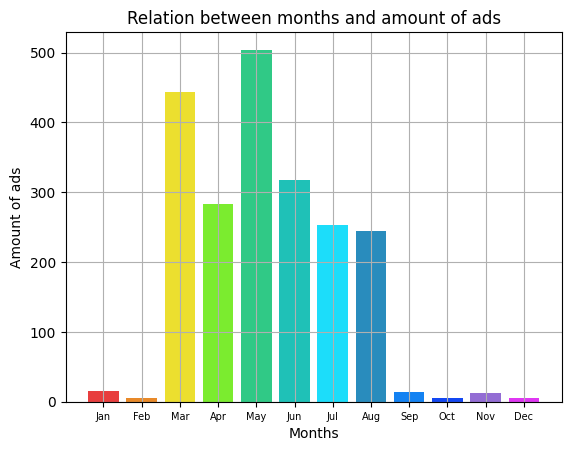

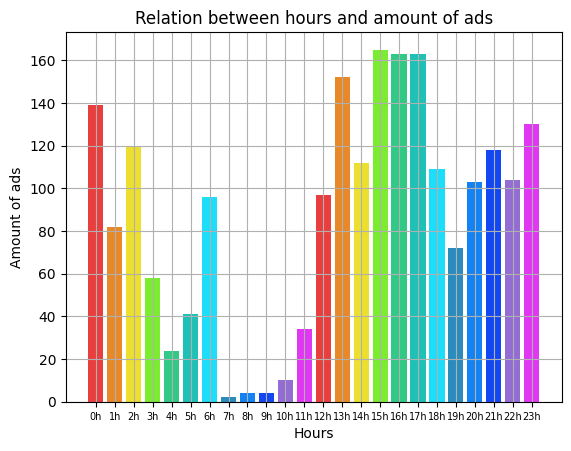

[array([ 15,   5, 444, 283, 504, 317, 253, 244,  14,   5,  13,   5]),
 array([139,  82, 120,  58,  24,  41,  96,   2,   4,   4,  10,  34,  97,
        152, 112, 165, 163, 163, 109,  72, 103, 118, 104, 130])]

In [225]:
months_and_hours_review(ads_activity, "ads", "amount of ads", target_label='TimeStamp')

### Reactions to ads

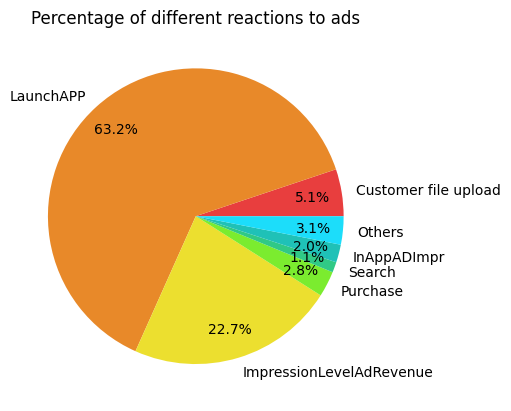

In [226]:
pie_review(ads_activity, 'Event', "different reactions to ads")

## Measures

In [227]:
sources = unique(ads_activity, 'Source')

print(f"I've had {len(sources)} different source-ads on tiktok")

I've had 52 different source-ads on tiktok


# HYPOTESES

## Hypotesis 1

#### Context

- The times and months when I receive the most messages tend to be the same times when I send the most messages
- Two-sided hypotesis
- H0: the times and months for receiving/sending messages are different
- HA: the times and months for receiving/sending messages are the same
- 5% significance level

#### Hours

In [228]:
sent_h, receive_h = data.guard['Messages']['H'][0], data.guard['Messages']['H'][1]

s_hip1_h, p_hip1_h = stats.pearsonr(sent_h, receive_h)
hypotesis_analysis(s_hip1_h, p_hip1_h, "Pearson correlation coefficient")

Pearson correlation coefficient : 0.9029
P-value : 0.0000
The null hypotesis is rejected



- Based on P-value, the H0 is rejected and the Pearson correlation coefficient is close to 1, indicating a strong and positive correlation between the messages received and the messages sents on the context of hours.

##### Graphic

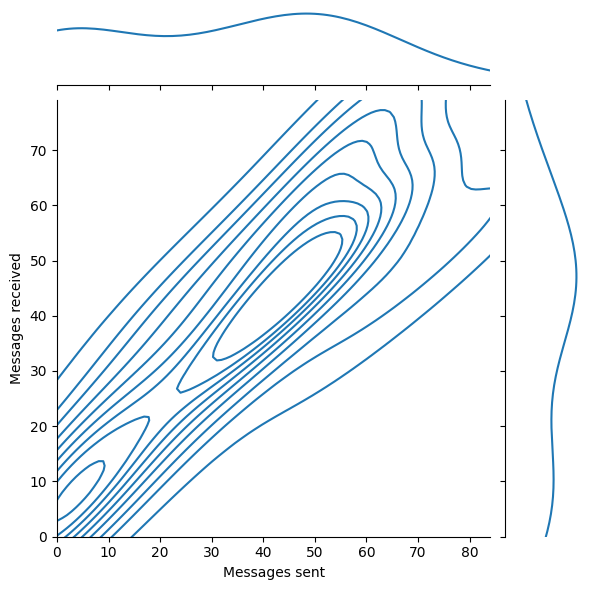

In [229]:
data_1_h = pd.DataFrame({'Messages sent': sent_h, 'Messages received': receive_h})

hypotesis_graphic(data_1_h, "Messages sent", "Messages received")

- Tha main graph suggests a positive correlation between the two labels: the lines have a tendency to tilt up, implying as the number of messages sent per hour increases the number of messages received per hour increases.
  - Analyzing the curves of the graphic, it is visible that there are slight changes of concavity; implying that this correlation isn't linearly perfect, it is more complex.
  - There are many dense areas, implying that there is a diversity of the messages activity.
  - Most of the data are centred but with few outliers (specially on top right) indicating some exceptional cases.
- The marginal graphics are about the single labels, the X-axis is about the messages sent per hour and the Y-axis isabout the messages received per hour.
  - Analyzing the histogram of messages sent we can see that it is slightly asymmetrical to the right with the concavity down, implying that as the number of messages sent increases the grown rate decreases.
    - So, I usually send less messages.
    - The peak of messages sent is in the range of 40-60.
  - Analyzing the histogram of messages received we can see that it is slightly asymmetrical to the right with the concavity up, implying that as the number of messages sent increases the grown rate increases.
    - So, I usually receive more messages.
    - The peak of messages received is in the range of 40-60.
  - To sum up, altough the peaks and the histograms are similar; the grown rates as the labels increases are different, suggesting heterogeneity of both labels; justifying why this correlation it's more complex.

#### Months

In [230]:
sent_m, receive_m = data.guard['Messages']['M'][0], data.guard['Messages']['M'][1]

s_hip1_m, p_hip1_m = stats.pearsonr(sent_m, receive_m)
hypotesis_analysis(s_hip1_m, p_hip1_m, "Pearson correlation coefficient")

Pearson correlation coefficient : 0.8485
P-value : 0.0005
The null hypotesis is rejected



- Based on P-value, the H0 is rejected and the Pearson correlation coefficient is close to 1, indicating a strong (not strong as the correlation on the context of hours) and positive correlation between the messages received and the messages sents on the context of months.

##### Graphic

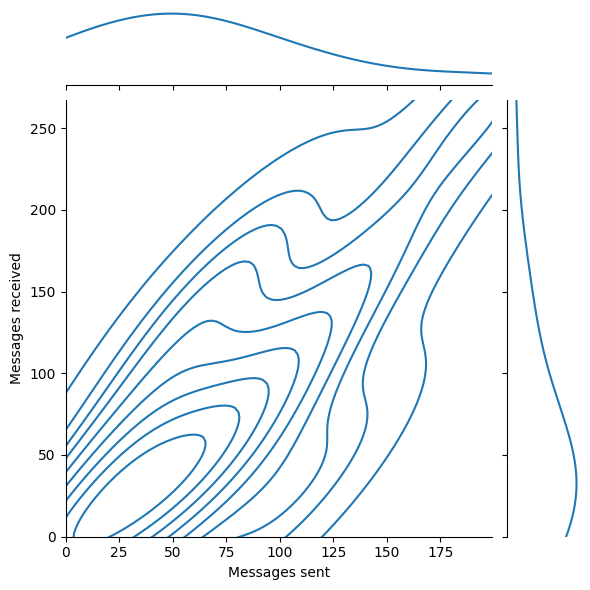

In [231]:
data_1_m = pd.DataFrame({'Messages sent': sent_m, 'Messages received': receive_m})

hypotesis_graphic(data_1_m, "Messages sent", "Messages received")

- Tha main graph suggests a positive correlation between the two labels: the lines have a tendency to tilt up, implying that as the number of messages sent per month increases the number of messages received per month increases.
  - Analyzing the curves of the graphic, it is visible that there are a few changes of concavity; implying that this correlation isn't linearly perfect, it is more complex (and it's more complex than the graphic of the hours).
  - There are many dense areas, implying that there is a diversity of the messages activity.
  - Most of the data are centred (not as centred as the data on the context of hours) but with few outliers indicating some exceptional cases.
- The marginal graphics are about the single labels, the X-axis is about the messages sent per month and the Y-axis isabout the messages received per month.
  - Analyzing the histogram of messages sent we can see that it is significantly asymmetrical to the right with the concavity down, implying that as the number of messages sent increases the grown rate decreases.
    - So, I usually send less messages.
    - The peak of messages sent is in the range of 25-75.
  - Analyzing the histogram of messages received we can see that it is significantly asymmetrical to the right with the concavity up, implying that as the number of messages sent increases the grown rate increases.
    - So, I usually receive more messages.
    - The peak of messages received is in the range of 200-250+.
  - To sum up, the peaks and the histograms are very different; the grown rates as the labels increases are different and both histograms have long tails, suggesting heterogeneity of both labels; this justifies why this correlation it's more complex.

#### Conclusion

We can conclude that the messages sent and the messages received are strongly correlated on both contexts but on the context of hours they have a slightly stronger correlation.

## Hypotesis 2

#### Context

- The times and months when I share the most tend to be the same times when I research the most
- Two-sided hypotesis
- H0: sharing/search times and months are different
- HA: sharing/search times and months are the same
- 5% significance level

#### Hours

In [232]:
share_h, search_h = data.guard['Share']['H'], data.guard['Search']['H']

s_hip2_h, p_hip2_h = stats.pearsonr(share_h, search_h)
hypotesis_analysis(s_hip2_h, p_hip2_h, "Pearson correlation coefficient")

Pearson correlation coefficient : 0.8373
P-value : 0.0000
The null hypotesis is rejected



- Based on P-value, the H0 is rejected and the Pearson correlation coefficient is close to 1, indicating a strong and positive correlation between the shares and the searchs on the context of hours.

##### Graphic

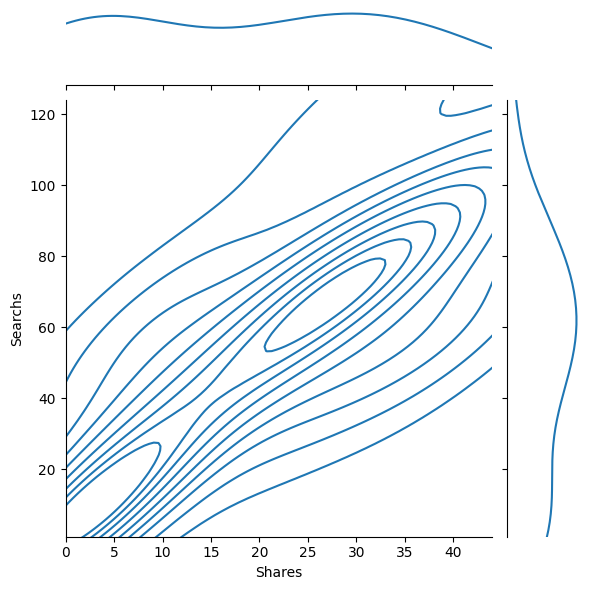

In [233]:
data_2_h = pd.DataFrame({'Shares': share_h, 'Searchs': search_h})

hypotesis_graphic(data_2_h, "Shares", "Searchs")

- Tha main graph suggests a positive correlation between the two labels: the lines have a tendency to tilt up, implying as the number of shares per hour increases the number of search per hour increases.
  - Analyzing the curves of the graphic, it is visible that there are a few changes of concavity; implying that this correlation isn't linearly perfect, it is more complex.
  - There are many dense areas, implying that there is a diversity of the messages activity.
  - Most of the data are centred but it has few outliers (specially on top right) indicating some exceptional cases.
- The marginal graphics are about the single labels, the X-axis is about the shares per hour and the Y-axis is about the searchs per hour.
  - Analyzing the histogram of shares we can see that it is slightly asymmetrical to the right with the concavity down, implying that as the number of shares increases the grown rate decreases.
    - So, I usually don't share too much.
    - The peak of shares is in the range of 0-5 or 25-30.
  - Analyzing the histogram of searchs we can see that it is slightly asymmetrical to the right with the concavity up, implying that as the number of searchs increases the grown rate increases.
    - So, I usually search more.
    - The peak of searchs is in the range of 60-80.
  - To sum up, the peaks and the histograms are very different; the grown rates as the labels increases are different, suggesting heterogeneity of both labels; this justifies why this correlation it's more complex.

#### Months

In [234]:
share_m, search_m = data.guard['Share']['M'][2:8], data.guard['Search']['M'][2:8]
# getting the months of MAR - AUG (the other months are outliers)

s_hip2_m, p_hip2_m = stats.pearsonr(share_m, search_m)
hypotesis_analysis(s_hip2_m, p_hip2_m, "Pearson correlation coefficient")

Pearson correlation coefficient : -0.7698
P-value : 0.0734
The null hypotesis is not rejected



- Based on P-value, the H0 is rejected and the Pearson correlation coefficient is in the middle between 0.5 to 1, indicating a strong (at some level) and negative correlation between the shares and the searchs on the context of months.

##### Graphic

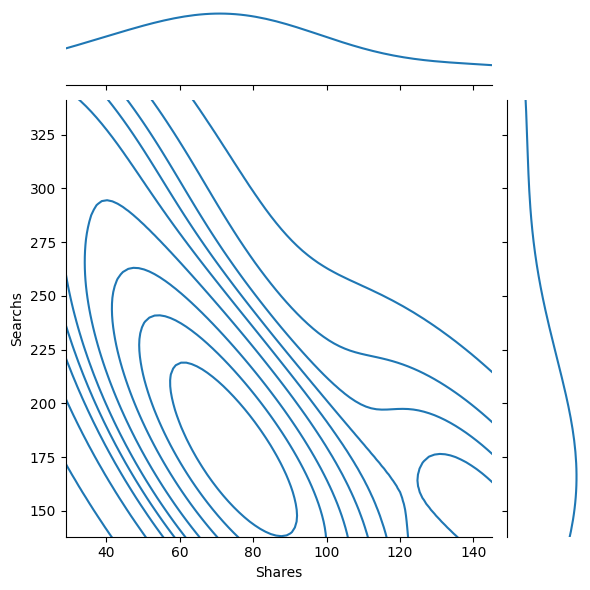

In [235]:
data_2_m = pd.DataFrame({'Shares': share_m, 'Searchs': search_m})

hypotesis_graphic(data_2_m, "Shares", "Searchs")

- Tha main graph suggests a negative correlation between the two labels: the lines have a tendency to tilt down, implying as the searchs per month increases the shares month decreases.
  - Analyzing the curves of the graphic, it is visible that there are a few changes of concavity; implying that this correlation isn't linearly perfect, it is more complex.
  - There are many dense areas, implying that there is a diversity of the messages activity.
  - Most of the data are centred but it has few outliers (specially on bottom right) indicating some exceptional cases.
- The marginal graphics are about the single labels, the X-axis is about the shares per month and the Y-axis is about the searchs per month.
  - Analyzing the histogram of shares we can see that it is asymmetrical to the right with the concavity down, implying that as the number of shares increases the grown rate decreases.
    - So, I usually don't share too much.
    - The peak of shares is in the range of 60-80.
  - Analyzing the histogram of searchs we can see thatbit is asymmetrical to the right with the concavity up, implying that as the number of searchs increases the grown rate decreases.
    - So, I usually search more.
    - The peak of searchs is in the range of 150-200.
  - To sum up, the peaks and the histograms are very different; the grown rates as the labels increases are different and both histograms have long tails, suggesting heterogeneity of both labels; this justifies why this correlation it's more complex.

#### Conclusion

- We can conclude that the shares and the searchs sent are strongly and positively correlated on the both contexts, but on the context of hours they have a significantly stronger correlation.

## Hypotesis 3

#### Context

- The proportion of liked videos is similar to the proportion of non-liked videos
- Two-sided hypotesis
- H0: the proportion of liked videos is the same as the proportion of non-liked videos
- HA: the proportion of liked videos is different to the proportion of non-liked videos
- 5% significance level

#### Result

In [239]:
# amount of liked video [march - august]
liked_videos = len(np.array(data.activity['Like List']['ItemFavoriteList']))

# amount of watched videos [march - august] (data.guard['Watched']['M'][1] : videos watched on february)
non_liked_videos = len(np.array(data.activity['Video Browsing History']['VideoList'])) - liked_videos - data.guard['Watched']['M'][1]

total_videos = liked_videos + non_liked_videos

s_hip3, p_hip3 = proportions_ztest(
    np.array([liked_videos, non_liked_videos]),
    np.array([total_videos, total_videos]),
    alternative='two-sided'
)

hypotesis_analysis(s_hip3, p_hip3, "Z-Statistic")

Z-Statistic : -132.9425
P-value : 0.0000
The null hypotesis is rejected



- Based on P-value, the H0 is rejected and the Z-Statistics is negative and have a great magnetude, indicating that the proportion of liked videos is way lower than the proportion of non-liked videos.

##### Graphic

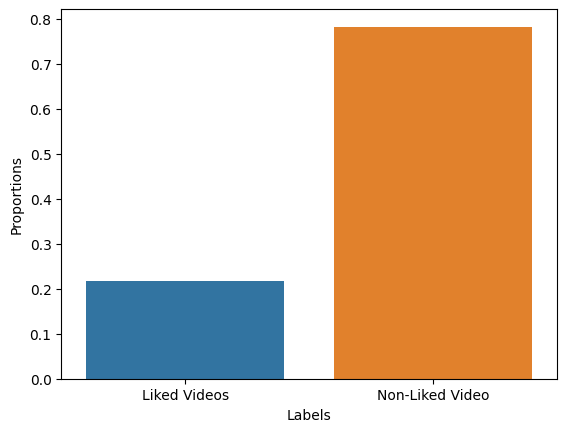

In [251]:
data = pd.DataFrame({'Proportions' : [liked_videos / total_videos, non_liked_videos / total_videos], 'Labels' : ['Liked Videos', 'Non-Liked Video']})

sns.barplot(data=data, x='Labels', y='Proportions', hue='Labels')
plt.show()

- As we can see, the ratio of liked videos to non-liked videos is about 1 to four

#### Conclusion

- We can conclude that is significantly more likely that I won't like the video instead of liking it, based on the P-value and the Z-Statistic.